## Introduction
- Toronto Bike Share (TBS) is looking to better understand bike usage trends and patterns in order to inform potential updates to their pricing model and operational procedures. 


- They have asked you to complete a large-scale analysis (50-100 hours) to address their business objectives (pricing and operations) using the data provided (Bike_share_all_clean.csv). This data has already been cleaned by their data engineering team (you can assume no further work is required for data cleaning). You only have an hour or two to start the work, and the ask above from TBS is not very well defined. 


- You can shape the initial work how you wish, whether that is documenting additional questions for TBS, data quality review, analysis, methodology development, project planning, etc. You are free to pick whichever path seems most useful, including any directions not listed here. You are shaping the path of this work. Please share the output of your initial work in any format you choose. 

### Exploratory Data Analysis
Since no specic business question is provided, so first I will explore the data to better understand it

In [1]:
#import required packages & libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the data
df=pd.read_csv("Bike_share_all_clean_katie.csv")

In [3]:
#Let's look at first 5 rows of the dataset
df.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223.0,7051,Wellesley St E / Yonge St (Green P),7089,Church St / Wood St,Member
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279.0,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394.0,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826.0,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279.0,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492367 entries, 0 to 1492366
Data columns (total 9 columns):
trip_id                  1492367 non-null int64
trip_start_time          1492367 non-null object
trip_stop_time           1492367 non-null object
trip_duration_seconds    1492367 non-null float64
from_station_id          1492367 non-null int64
from_station_name        1492367 non-null object
to_station_id            1492367 non-null int64
to_station_name          1492367 non-null object
user_type                1492367 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 102.5+ MB


By just looking at the data info, it doesn't have any missing values. All the columns have equal values. We can further confirm if there any missing values with the help of command. 

In [6]:
# Check if there is any missing value
df.isnull().values.any() 

False

Its returning False, which means no missing values in the data. 

In [5]:
df.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,1.492367e+06,1.492367e+06,1.492367e+06,1.492367e+06
mean,1.553652e+06,1.017616e+03,7.095931e+03,7.095268e+03
std,4.758040e+05,9.772793e+03,7.681040e+01,7.664149e+01
min,7.123820e+05,1.000000e+00,7.000000e+03,7.000000e+03
25%,1.147384e+06,4.150000e+02,7.032000e+03,7.033000e+03
50%,1.558954e+06,6.540000e+02,7.069000e+03,7.068000e+03
75%,1.961200e+06,1.020000e+03,7.161000e+03,7.161000e+03
max,2.383646e+06,6.382030e+06,7.290000e+03,7.290000e+03


The statstics of data isn't of much use, since distribution of Ids and trip seconds isn't much useful by just looking at it. Lets confirm if there are any missing values in the the data. 

In [7]:
#Lets check the timeperiod of dataset
print(min(df.trip_start_time), max(df.trip_stop_time)) 

2017-01-01 00:00:00 2017-12-31 23:58:24


- **We can observe that this Dataset belongs to 2017**

#### Before moving forward with the EDA, lets convert the objects into DateTime format. Then we will extract the hour, month and day of the week from both columns

In [8]:
df['trip_start_time'] = pd.to_datetime(df['trip_start_time'])
df['trip_stop_time'] = pd.to_datetime(df['trip_stop_time'])
df['hour_start'] = df['trip_start_time'].apply(lambda time: time.hour)
df['month_start'] = df['trip_start_time'].apply(lambda time: time.month)
df['weekday_start'] = df['trip_start_time'].apply(lambda time: time.dayofweek)
df['hour_stop'] = df['trip_stop_time'].apply(lambda time: time.hour)
df['month_stop'] = df['trip_stop_time'].apply(lambda time: time.month)
df['weekday_stop'] = df['trip_stop_time'].apply(lambda time: time.dayofweek)

mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month_start'] = df['month_start'].map(mon)
df['month_stop'] = df['month_stop'].map(mon)

day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['weekday_start'] = df['weekday_start'].map(day)
df['weekday_stop'] = df['weekday_stop'].map(day)

## Questions as per Business Requirement: 
- Business requirement is to understand bike usage trends and patterns in order to inform potential updates to their pricing model and operational procedures. 
- So I decided to better understand the data in terms of its members and non members.Understanding patterns in rides, busy stations for members as well as casual rides. 
- Since business is intereted in understaing these patterns for pricing and operations so I thought it will help them in understanding which stations are busy, so that they can look at those stations in terms of more operational optimization to provide better service. 
- If they look at the patterns of members as well as casual riders then they can decide better pricing, offers for members(loyalty rewards) as well for casual riders(discounts for new members).

#### Questions to explore
- 1. How many users are members and casual riders for TBS?
- 2. Explore Ridership patterns per month
- 3. Explore Ridership patterns per day
- 4. Explore Ridership patterns per hour
- 5. Find the top Departing and Arriving stations for Members. ie Find busiest stations
- 6. Find the top Departing and Arriving stations for Casual riders.
- 7. See Daily Activity of TBS Riders
- 8. Stations that are most frequented by two-way travellers
- 9. Explore Bike Availability or lack of it at stations

### How does the Toronto Bike Share membership look?

Text(0.5, 1.0, 'Toronto Bike Share Membership')

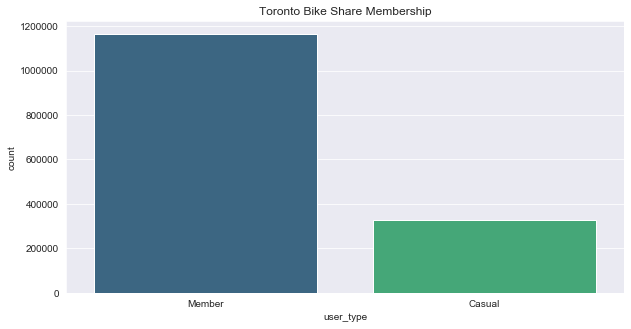

In [9]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(x='user_type',data=df,palette='viridis')
plt.title('Toronto Bike Share Membership')

- **We can see around 80% of the users are members based on this data in year 2017**

### Lets explore Ridership patterns per month

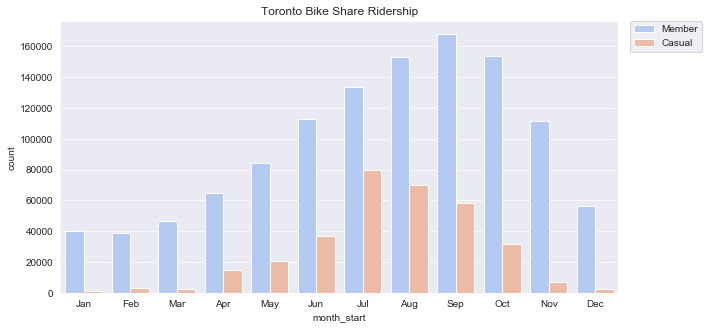

In [10]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=df, x='month_start', hue='user_type', palette='coolwarm')
plt.title('Toronto Bike Share Ridership')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


- **The amount of rides increased as the weather got warmer. Ridership peaked for both members as well casual riders during the months from Jun-Oct in 2017.**

### Lets look at Ridership patterns per day

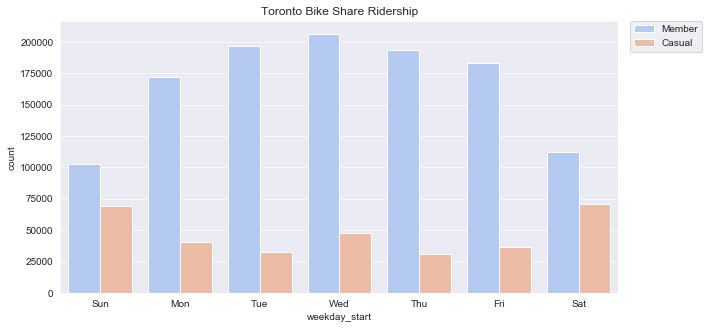

In [11]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=df, x='weekday_start', hue='user_type', palette='coolwarm')
plt.title('Toronto Bike Share Ridership')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

- **Members rode mostly during the weekdays; especially from Tuesday to Thursday, While casual riders were riding mostly on weekends.** 

### Ridership patterns per hour

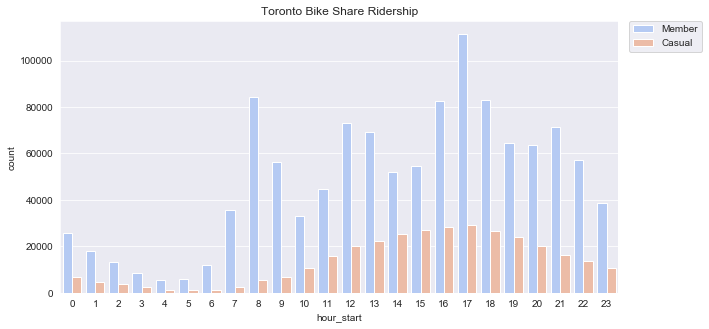

In [12]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=df, x='hour_start', hue='user_type', palette='coolwarm')
plt.title('Toronto Bike Share Ridership')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

- **Members rode between 8am-9am and 4pm-6pm; while casual riders were riding throughout the day (noon to the early evening hours).**

### Top/Busiest five Departing and Arriving stations for Members

Text(0.5, 1.0, 'Top 5 Departing Stations Members')

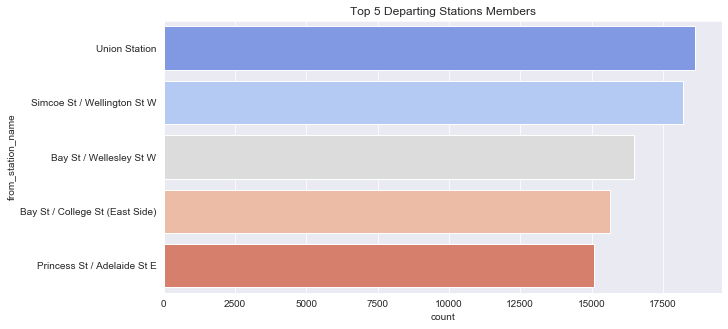

In [13]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=df[df.user_type=='Member']['from_station_name'],data=df, palette='coolwarm',order=df[df.user_type=='Member']['from_station_name'].value_counts().index[:5])
plt.title('Top 5 Departing Stations Members')

**Here we can we most busiest station was union station, then wellington St and so on**


Text(0.5, 1.0, 'Top 5 Arriving Stations for Members')

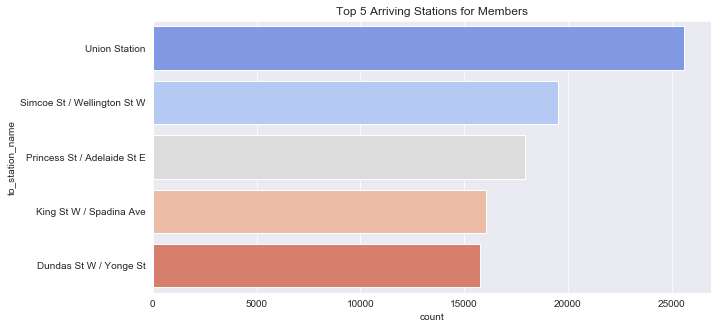

In [14]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=df[df.user_type=='Member']['to_station_name'],data=df, palette='coolwarm',order=df[df.user_type=='Member']['to_station_name'].value_counts().index[:5])
plt.title('Top 5 Arriving Stations for Members')

- **Union Station was the busiest station for members as it was the top arrival and departure station**

### Top/Busiest Arrival and Departing stations among casual riders


Text(0.5, 1.0, 'Top 5 Departing Stations for Casual Riders')

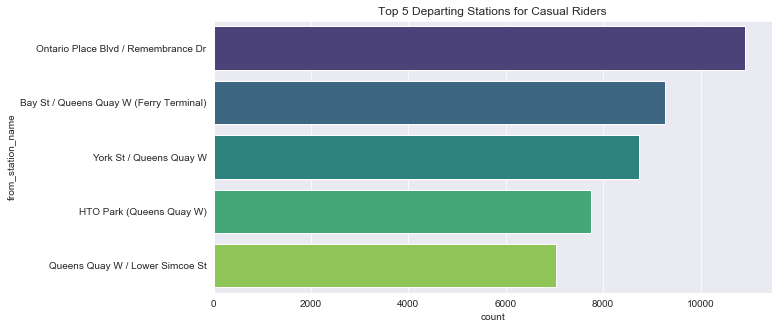

In [15]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=df[df.user_type=='Casual']['from_station_name'],data=df, palette='viridis',order=df[df.user_type=='Casual']['from_station_name'].value_counts().index[:5])
plt.title('Top 5 Departing Stations for Casual Riders')


Text(0.5, 1.0, 'Top 5 Arriving Stations for Casual Riders')

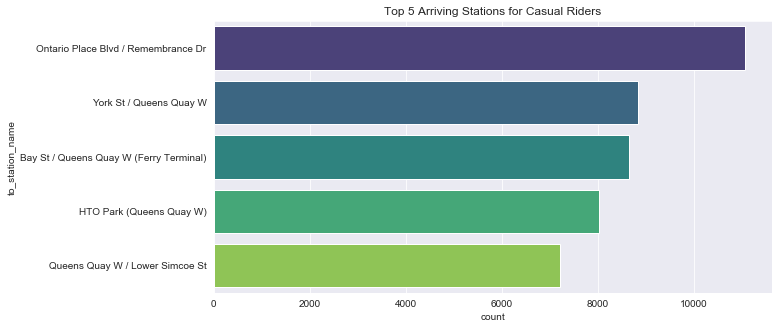

In [16]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=df[df.user_type=='Casual']['to_station_name'],data=df, palette='viridis',order=df[df.user_type=='Casual']['to_station_name'].value_counts().index[:5])
plt.title('Top 5 Arriving Stations for Casual Riders')

- **Ontario Place Blvd/Remembrance Dr was the busiest station for casual riders as it was the top arrival and departure station for them**

####  Heat Map to see the daily activity

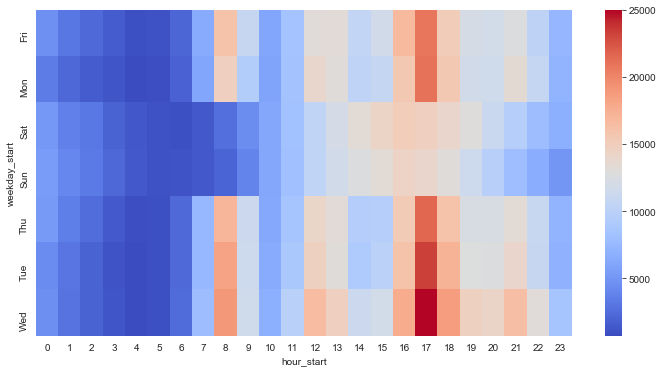

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.groupby(by=['weekday_start','hour_start']).count()['user_type'].unstack(),cmap='coolwarm')

- **The heatmap shows us that most of the activity occured on Wednesday, Tuesday and Thursday at 17hrs ie 5pm.**

#### Stations that are most frequented by two-way travellers

In [18]:
station = list(set(list(df.from_station_name.values) + list(df.to_station_name.values)))

df1 = df.copy()
df1['time'] = pd.to_datetime(df1.trip_start_time)
df1.index = df1.time.dt.date
df1.index.name = 'index'

route = df1[['from_station_name', 'to_station_name']]

#Separate two-way traveller with one-way traveller for each station

twoway = route.copy()
twoway = twoway[twoway.from_station_name == twoway.to_station_name]
oneway = route.copy()
oneway = oneway[oneway.from_station_name != oneway.to_station_name]

twoway_map = twoway.groupby('from_station_name').count().sort_values(by='to_station_name', ascending=False)



- **Top 10 Stations with the highest number of two-way travellers**

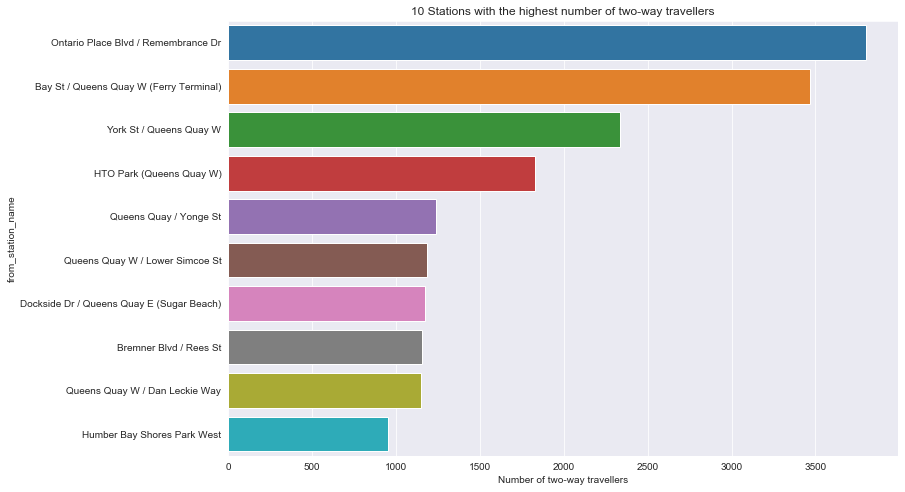

In [19]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.title('10 Stations with the highest number of two-way travellers')
plt.xlabel("Number of two-way travellers")
sns.barplot(x = twoway_map[:10].values.flatten(),
            y = twoway_map[:10].index,
            )

- **Here we observe that Ontario Place Blvd/Remembrance Dr had the most number of two-way travellers ie 3802**

### Now let's look at the Bike Availability at Stations

In [20]:
# Lets create a table for the number of bikes leaving ('from_station') and entering ('to_station') each day

# by mapping the number of outgoing bike from each station each day
# and mapping the number of incoming bike to each station each day
outgoing = pd.get_dummies(df1.from_station_name).groupby('index').sum()
incoming = pd.get_dummies(df1.to_station_name).groupby('index').sum()

In [21]:
outgoing.head()

,111 Bond St (North of Dundas St E) - SMART,161 Bleecker St (South of Wellesley),25 York St (ACC/Union Station South),424 Wellington St W,51 Parliament St,519 Church St - SMART,80 Clinton St (North of College),Adelaide St W / Bay St - SMART,Augusta Ave / Denison Sq,Augusta Ave / Dundas St W,...,Wychwood Ave / Benson Ave - SMART,Yarmouth Rd / Christie St,Yonge St / Alexander St - SMART,Yonge St / Aylmer Ave,Yonge St / Dundonald St - SMART,Yonge St / Harbour St,Yonge St / Wood St,Yonge St / Yorkville Ave,York St / King St W - SMART,York St / Queens Quay W
index,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,0.0,4.0,3.0,1.0,0.0,1.0,0.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0,0.0,4.0
2017-01-02,0.0,3.0,2.0,4.0,3.0,0.0,1.0,0.0,2.0,5.0,...,0.0,4.0,0.0,0.0,0.0,6.0,6.0,2.0,0.0,9.0
2017-01-03,0.0,6.0,8.0,8.0,5.0,0.0,3.0,0.0,5.0,5.0,...,0.0,2.0,0.0,0.0,0.0,7.0,5.0,1.0,0.0,9.0
2017-01-04,0.0,11.0,7.0,11.0,5.0,0.0,1.0,0.0,4.0,12.0,...,0.0,1.0,0.0,0.0,0.0,11.0,15.0,4.0,0.0,18.0
2017-01-05,0.0,10.0,8.0,10.0,4.0,0.0,2.0,0.0,4.0,12.0,...,0.0,2.0,0.0,3.0,0.0,8.0,12.0,2.0,0.0,9.0


In [22]:
incoming.head()

,111 Bond St (North of Dundas St E) - SMART,161 Bleecker St (South of Wellesley),25 York St (ACC/Union Station South),424 Wellington St W,51 Parliament St,519 Church St - SMART,80 Clinton St (North of College),Adelaide St W / Bay St - SMART,Augusta Ave / Denison Sq,Augusta Ave / Dundas St W,...,Wychwood Ave / Benson Ave - SMART,Yarmouth Rd / Christie St,Yonge St / Alexander St - SMART,Yonge St / Aylmer Ave,Yonge St / Dundonald St - SMART,Yonge St / Harbour St,Yonge St / Wood St,Yonge St / Yorkville Ave,York St / King St W - SMART,York St / Queens Quay W
index,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,4.0,6.0,2.0,0.0,0.0,2.0,0.0,7.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,4.0
2017-01-02,0.0,3.0,7.0,9.0,1.0,0.0,4.0,0.0,5.0,6.0,...,0.0,2.0,0.0,0.0,0.0,6.0,6.0,2.0,0.0,13.0
2017-01-03,0.0,4.0,8.0,4.0,4.0,0.0,3.0,0.0,3.0,5.0,...,0.0,1.0,0.0,1.0,0.0,6.0,5.0,3.0,0.0,11.0
2017-01-04,0.0,11.0,8.0,9.0,6.0,0.0,0.0,0.0,3.0,12.0,...,0.0,0.0,0.0,1.0,0.0,16.0,14.0,3.0,0.0,24.0
2017-01-05,0.0,9.0,13.0,10.0,2.0,0.0,2.0,0.0,6.0,10.0,...,0.0,1.0,0.0,3.0,0.0,12.0,8.0,2.0,0.0,14.0


**Now, Lets calculate the bike availabilty ie outgoing bikes - incoming bikes**

- if the result >= 0 then there are enough bike available in the station to be used next morning
- if the result < 0 then we need crew to return some bikes back to the station from other station

In [23]:
print('Number of Stations with enough bike to use next morning for each day')
((incoming - outgoing)>=0).sum(axis=1)

Number of Stations with enough bike to use next morning for each day


index
2017-01-01    198
2017-01-02    198
2017-01-03    195
2017-01-04    189
2017-01-05    189
2017-01-06    194
2017-01-07    200
2017-01-08    206
2017-01-09    195
2017-01-10    205
2017-01-11    185
2017-01-12    185
2017-01-13    186
2017-01-14    199
2017-01-15    198
2017-01-16    184
2017-01-17    205
2017-01-18    183
2017-01-19    183
2017-01-20    179
2017-01-21    181
2017-01-22    195
2017-01-23    182
2017-01-24    189
2017-01-25    180
2017-01-26    191
2017-01-27    184
2017-01-28    198
2017-01-29    192
2017-01-30    186
             ... 
2017-12-02    158
2017-12-03    159
2017-12-04    149
2017-12-05    144
2017-12-06    150
2017-12-07    143
2017-12-08    156
2017-12-09    156
2017-12-10    170
2017-12-11    146
2017-12-12    176
2017-12-13    169
2017-12-14    162
2017-12-15    158
2017-12-16    176
2017-12-17    169
2017-12-18    171
2017-12-19    157
2017-12-20    146
2017-12-21    154
2017-12-22    176
2017-12-23    189
2017-12-24    196
2017-12-25    231
2017

In [24]:
print('Number of Stations with no bike to use next morning for each day')
((incoming - outgoing)<0).sum(axis=1)

Number of Stations with no bike to use next morning for each day


index
2017-01-01     76
2017-01-02     76
2017-01-03     79
2017-01-04     85
2017-01-05     85
2017-01-06     80
2017-01-07     74
2017-01-08     68
2017-01-09     79
2017-01-10     69
2017-01-11     89
2017-01-12     89
2017-01-13     88
2017-01-14     75
2017-01-15     76
2017-01-16     90
2017-01-17     69
2017-01-18     91
2017-01-19     91
2017-01-20     95
2017-01-21     93
2017-01-22     79
2017-01-23     92
2017-01-24     85
2017-01-25     94
2017-01-26     83
2017-01-27     90
2017-01-28     76
2017-01-29     82
2017-01-30     88
             ... 
2017-12-02    116
2017-12-03    115
2017-12-04    125
2017-12-05    130
2017-12-06    124
2017-12-07    131
2017-12-08    118
2017-12-09    118
2017-12-10    104
2017-12-11    128
2017-12-12     98
2017-12-13    105
2017-12-14    112
2017-12-15    116
2017-12-16     98
2017-12-17    105
2017-12-18    103
2017-12-19    117
2017-12-20    128
2017-12-21    120
2017-12-22     98
2017-12-23     85
2017-12-24     78
2017-12-25     43
2017

### Recommendations
- **For the stations that have no bikes available, the crew of Toronto BikeShare App can return bikes to the station for next morning**
- **May be we should add more bikes in the stations or require members to return their own bikes**

#### Lack of Bike Availabilty - There are some stations that always have lack of bikes for more than 200 days of the year.


In [25]:
(((incoming - outgoing)<0).sum(axis=0)>200).sum()

54

**We see there are 54 stations that have 0 bikes for more than 200 days of the year**

### Top 10 Bike Station and the total number of days in 2017 where stations had 0 bikes**

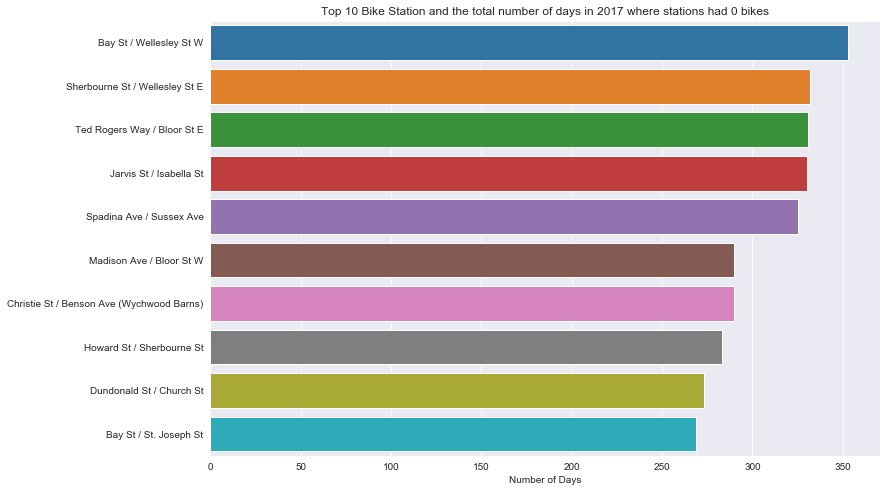

In [26]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.title('Top 10 Bike Station and the total number of days in 2017 where stations had 0 bikes')
plt.xlabel("Number of Days")
sns.barplot(x = ((incoming - outgoing)<0).sum(axis=0).sort_values(ascending=False)[:10],
            y = ((incoming - outgoing)<0).sum(axis=0).sort_values(ascending=False)[:10].index,
            )

**Bay St/Wellesley St W station had about 350 days when 0 bikes were available**

In [28]:
bike_avail = incoming - outgoing # incoming bikes minus outgoing bikes
bike_avail = np.absolute(bike_avail[bike_avail < 0]) # show only less than 0 bikes available

### Top 10 Stations with the highest number of required returned bikes in a day

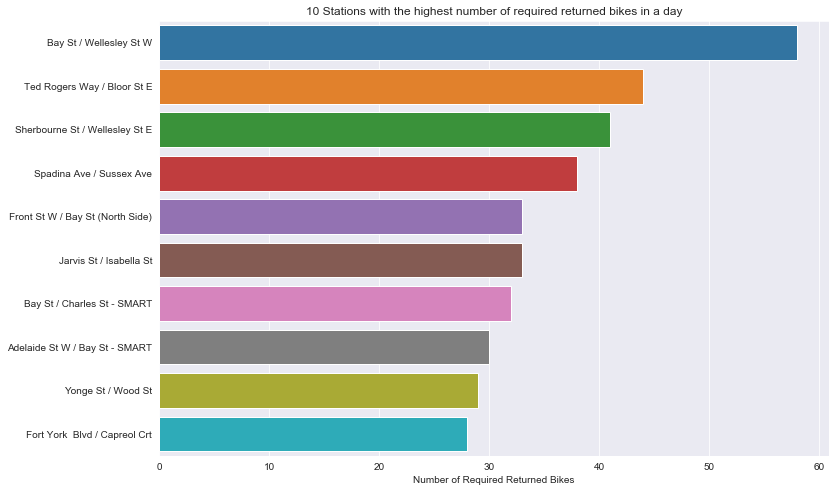

In [29]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.title('10 Stations with the highest number of required returned bikes in a day')
plt.xlabel("Number of Required Returned Bikes")
sns.barplot(x = np.max(bike_avail, axis=0).sort_values(ascending=False)[:10],
            y = np.max(bike_avail, axis=0).sort_values(ascending=False)[:10].index,
            )

**Bay St/Wellesley St W station has the highest number of required returned bikes in a day**

### Conclusion & Future Work

- **We observe this Dataset belongs to 2017. We can see around 80% of the users are members!**
- **The amount of rides increased as the weather got warmer. Ridership peaked during the summer months.**
- **Members rode mostly during the week; especially from Tuesday to Thursday. That may be the case because most of the members are using to commute to their work. While Casual riders were riding mostly on weekends, that might be the case because they might be using the bikes for their personal use**
- **Union Station was the busiest station for members as it was the top arrival and departure station**. That could be because some members might be first travelling by train to come from other places and then using bike to reach their offices. 
- **Ontario Place Blvd/Remembrance Dr was the busiest station for casual riders as it was the top arrival and departure station for them**. That could be because this route is on the lakeside with proper path for bikes, which makes it very convenient for the riders to enjoy their day on weekends.
- **The heatmap shows us that most of the activity occured on Wednesday, Tuesday and Thursday at 17hrs ie 5pm.**
- **We observe that Ontario Place Blvd/Remembrance Dr had the most number of two-way travellers ie 3802**


#### We get a lot of insight into ridership patterns, trends for stations, bike availabity issues across stations for the year and much more. Based on the above observations and conclusion Toronto Bike Share (TBS) will be able to better understand bike usage trends and patterns in order to inform potential updates to their pricing model and operational procedures. 

### Recommendations

- **For the stations that have no bikes available, the crew of Toronto BikeShare App can return bikes to the station for next morning. We should add more bikes at those locations stations.**
- **Bay St/Wellesley St W station had about 350 days where 0 bikes were available**
- **Bay St/Wellesley St W station has the highest number of required returned bikes in a day**
- **Since union station is busiest among members, so better pricing/offers can be offerd for daily commuters to gain more customers at this station**
- **Likewise for casual riders better pricing/offers can be promoted for new members at Rmemberance Dr route**


**After the above Explorator Data Analysis I would like to investigate the flow of bikes in the Toronto Bike Share Service ie Does bike share go round-trip or one-way?**

The purpose would be to analyse the flow of bikes. Are bikes returned to its initial location? Or are there flows of bike from one region to another?

The sum of all the travels for each station for one year are too noisy, so

- Data can be split between weekend days or not
- Stations can be grouped by proximity in order to define regions
- Data can be summarized by period of time ie Day, Week , Month, Year

We can create a Graph representation where :

- A node is a station or a region
- An edge is the sum of all travel between 2 nodes during a period of time
- For each node we consider the balance between outgoing and incoming flows
- For simplicity purposes : a travel from one station to the same station is not taken in account. (balance is zero)
- For simplicity purposes : the inverse edges are grouped as follow
   - 10 travels from 1 to 2 and 12 travels from 2 to 1, gives -2 travels from 1 to 2 
   - 5 travels from 1 to 2 and 4 travels from 2 to 1, gives +1 travels from 1 to 2

The plan moving forward will be to

- Get station information, Load the data, Cluster the stations by regions